# Bank Loan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('min_rows', 20)
pd.set_option('max_rows', 35)

In [3]:
df = pd.read_csv('bank_loan.csv')

D:\A\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning and Wrangling


### 1. Check missing values in each columns and clean them.

In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
                              ...  
num_tl_90g_dpd_24m            39717
num_tl_op_past_12m            39717
pct_tl_nvr_dlq                39717
percent_bc_gt_75              39717
pub_rec_bankruptcies            697
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

- find the percentage of missing values in each column.

In [6]:
round(df.isnull().sum()/len(df.index), 2) * 100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
term                            0.0
int_rate                        0.0
installment                     0.0
grade                           0.0
sub_grade                       0.0
                              ...  
num_tl_90g_dpd_24m            100.0
num_tl_op_past_12m            100.0
pct_tl_nvr_dlq                100.0
percent_bc_gt_75              100.0
pub_rec_bankruptcies            2.0
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

- Let's remove the columns having more than 90% missing values.

In [7]:
missing_values = df.columns[(df.isnull().sum()/len(df.index)) * 100 > 90]

missing_values

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [8]:
df = df.drop(missing_values,
             axis=1)

df.shape

(39717, 55)

In [9]:
100 * (df.isnull().sum()/len(df.index)).sort_values(ascending=False)

mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
                                ...    
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
Length: 55, dtype: float64

In [10]:
df = df.drop(['mths_since_last_delinq',
              'desc'],
              axis=1)

- Let's check number of missing values again, does all columns have less than 90% missing values?

In [11]:
100 * (df.isnull().sum()/len(df.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
                                ...   
last_pymnt_amnt               0.000000
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
policy_code                   0.000000
application_type              0.000000
acc_now_delinq                0.000000
chargeoff_within_12_mths      0.140998
delinq_amnt                   0.000000
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
Length: 53, dtype: float64

- How to check missing values rows-wise?

In [12]:
df.isnull().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
        ..
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

- How to check whether some rows have more than 5 missing values?

In [13]:
len(df[df.isnull().sum(axis=1) > 5].index)

0

> The dataset is cleaned now.


### 2. Let's check whether all the columns are in the correct format or not.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

- We find that the column **int_rate** is character type, let's convert it to float.

In [15]:
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
         ...  
39707     9.33
39708     9.96
39709    11.22
39710     7.43
39711     8.70
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

## Exploratory Data Analysis


### 3. There are some variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [16]:
remove_columns = ["delinq_2yrs",
                  "earliest_cr_line",
                  "inq_last_6mths",
                  "open_acc",
                  "pub_rec",
                  "revol_bal",
                  "revol_util",
                  "total_acc",
                  "out_prncp",
                  "out_prncp_inv",
                  "total_pymnt",
                  "total_pymnt_inv",
                  "total_rec_prncp",
                  "total_rec_int",
                  "total_rec_late_fee",
                  "recoveries",
                  "collection_recovery_fee",
                  "last_pymnt_d",
                  "last_pymnt_amnt",
                  "last_credit_pull_d",
                  "application_type"]

In [17]:
df = df.drop(remove_columns,
             axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

- Also, we won't use the variables zip code, address, state etc.

In [18]:
df = df.drop(['url',
              'title',
              'zip_code',
              'addr_state'],
             axis=1)

### Let's have a look at the target variable--loan_status.

> Objecive: Re-label the values to a binary form: namely, 0 or 1,


- 1 indicating that the person has defaulted and
- 0 otherwise.

In [19]:
df['loan_status'] = df['loan_status'].astype('category')

df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

- We see that `fully paid` comprises most of the loans.



- The ones marked `current` are neither fully paid not defaulted, so let's get rid of the current loans.



- Hence, we will have two categories to label as 0 or 1.

In [20]:
df = df[df['loan_status'] != 'Current']

> Filter for Fully Paid and Charged Off


> Using lambda, let's label Fully Paid and Charged Off

In [21]:
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)


df['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

## 4. Let's look at the overall default rate and visualize default rates across grade of the loan.

In [22]:
print('Overall default rate:', round(np.mean(df['loan_status']), 2))

Overall default rate: 0.15


Text(0.5, 1.0, 'Loan Status Under different Grades')

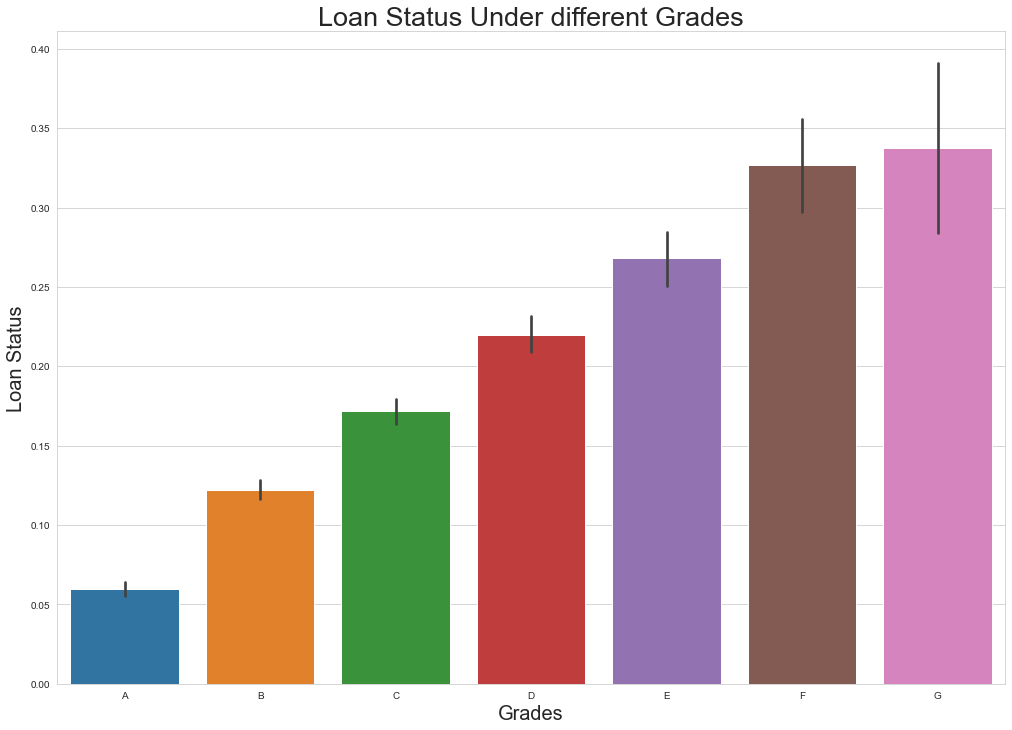

In [23]:
orders = ['A','B','C','D','E','F','G']

sns.set_style('whitegrid')
plt.figure(figsize=(17,12))

sns.barplot(x='grade',
            y='loan_status',
            data=df,
            order=orders)

plt.xlabel('Grades', fontsize=20)
plt.ylabel('Loan Status', fontsize=20)
plt.title('Loan Status Under different Grades', fontsize=27)

### Create a function to plot `loan_status` across `any categorical variable.`

In [24]:
def plots(categorical_variable):
    sns.set_style('whitegrid')
    plt.figure(figsize=(17,12))
    
    sns.barplot(x = categorical_variable,
                y = 'loan_status',
                data = df)
    
    plt.xlabel(categorical_variable, fontsize=20)
    plt.ylabel('Loan Status', fontsize=20)
    
    plt.show()

> First, let's check how's default rates across grade of loan by using our newly created function.

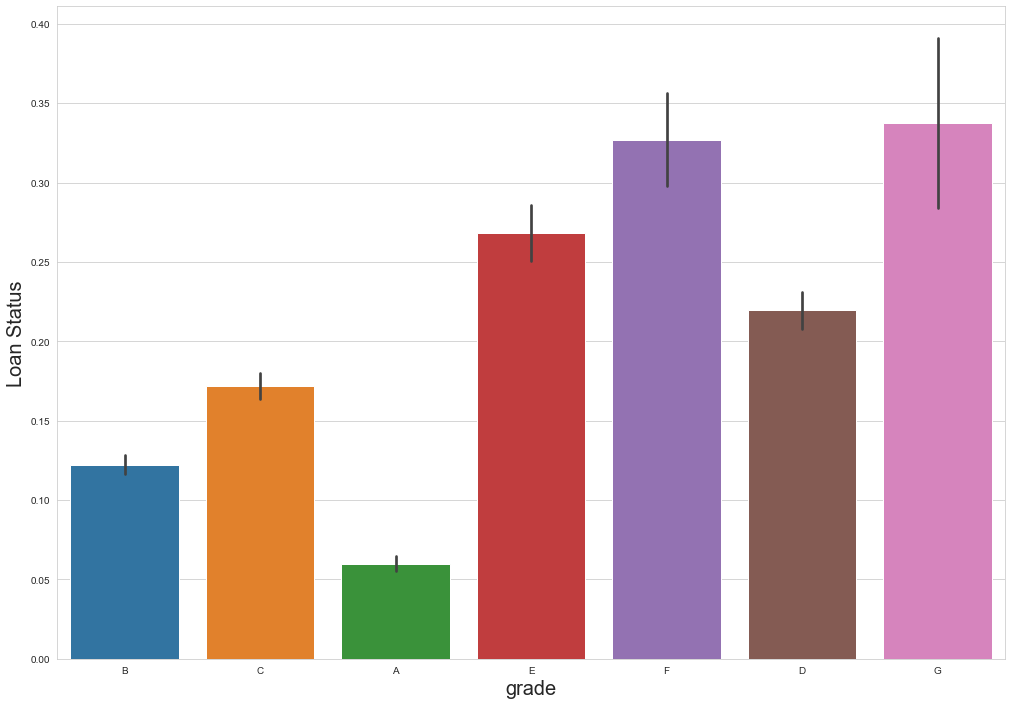

In [25]:
plots('grade')

> Then, we can check `term` in our new plotting function.

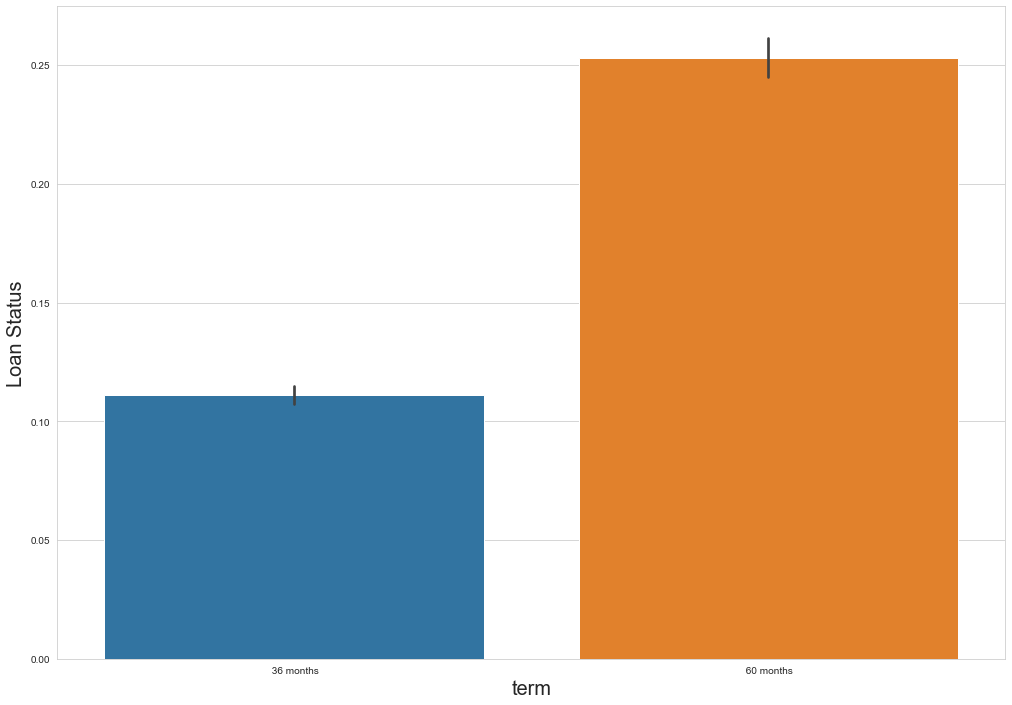

In [26]:
plots('term')

#### home_ownership

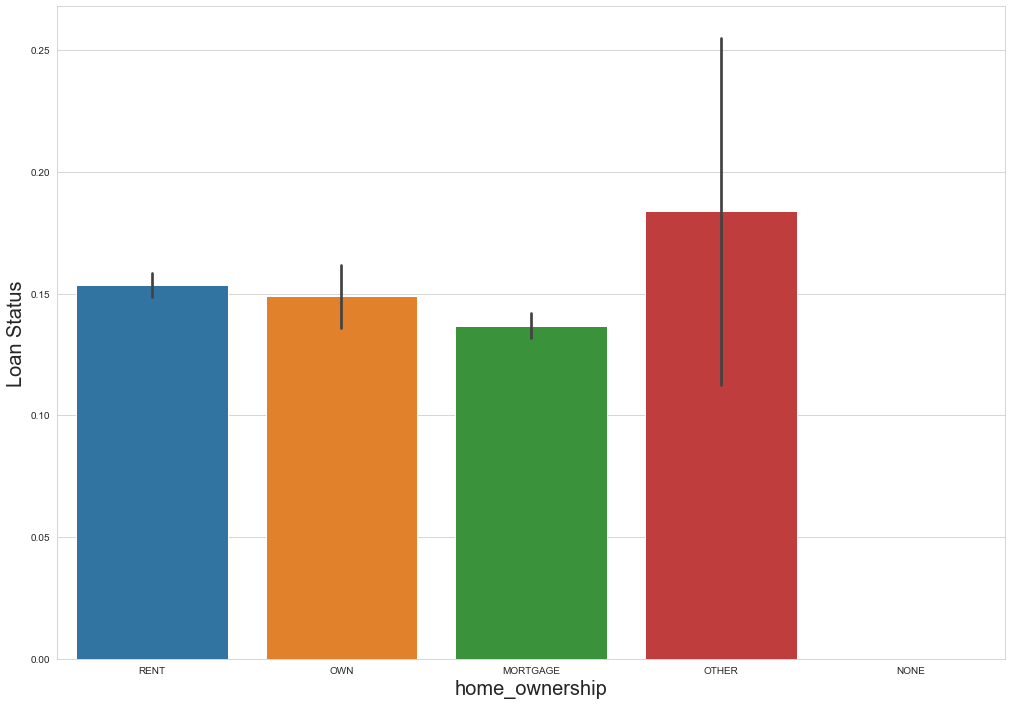

In [27]:
plots('home_ownership')

#### verification_status

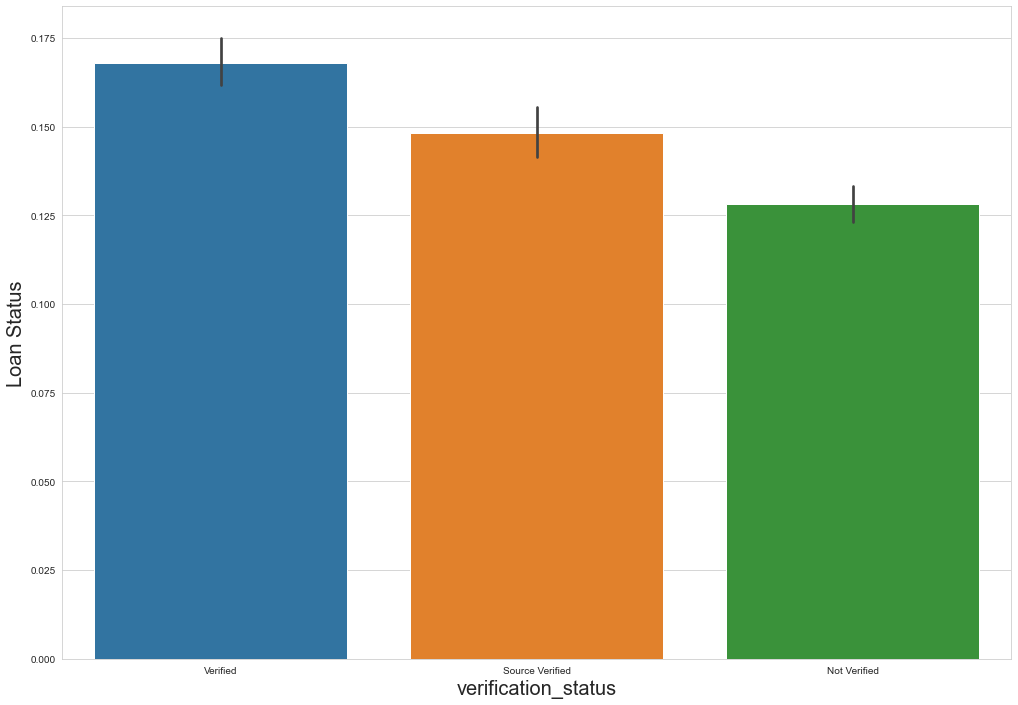

In [28]:
plots('verification_status')

#### Loan purpose

<Figure size 1296x576 with 0 Axes>

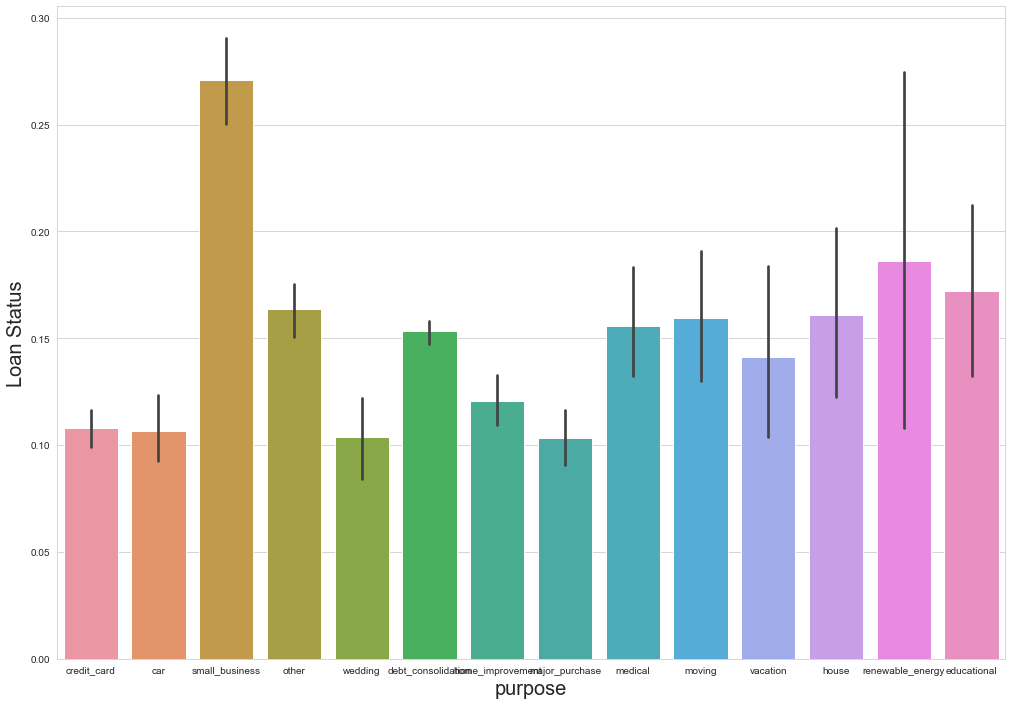

In [29]:
plt.figure(figsize=(18,8))
plots('purpose')

## 5. Let's find the distribution of loans across time.


- Let's convert the column `issue_d` into datetime and then extract year and month from it.

In [30]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [31]:
from datetime import datetime

df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [32]:
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

> Let's examine the number of loans granted across years.

In [33]:
df.groupby('year')['year'].count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

> Let's examine the number of loans granted across months.

In [34]:
df.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

> Compare the default rates across years.

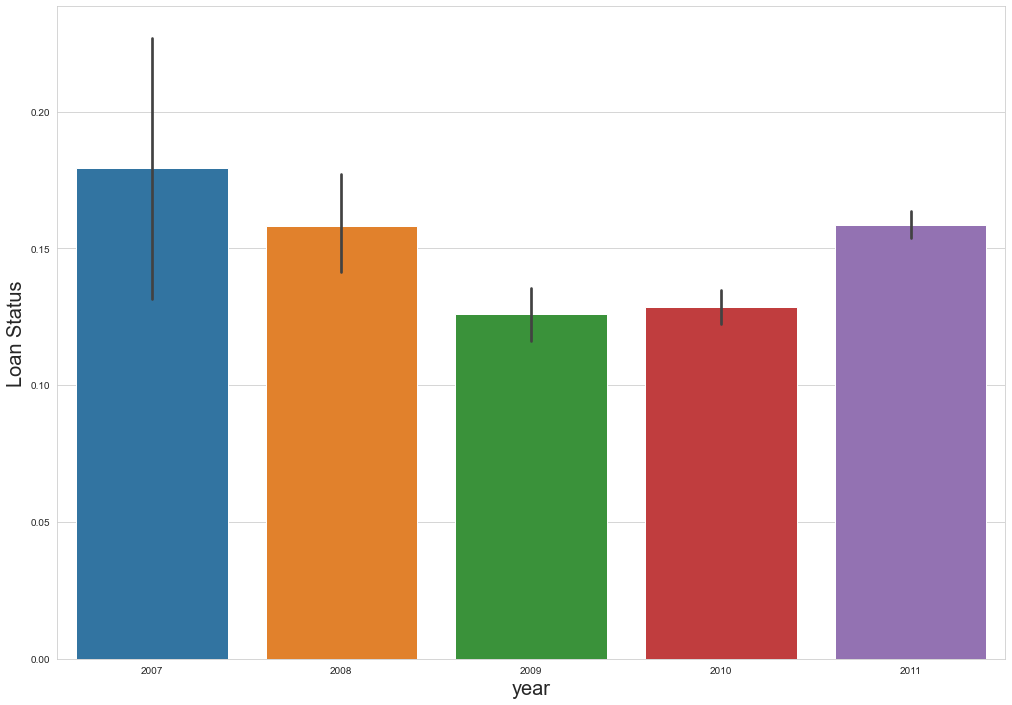

In [35]:
plots('year')

> Let's compare default rates across months.

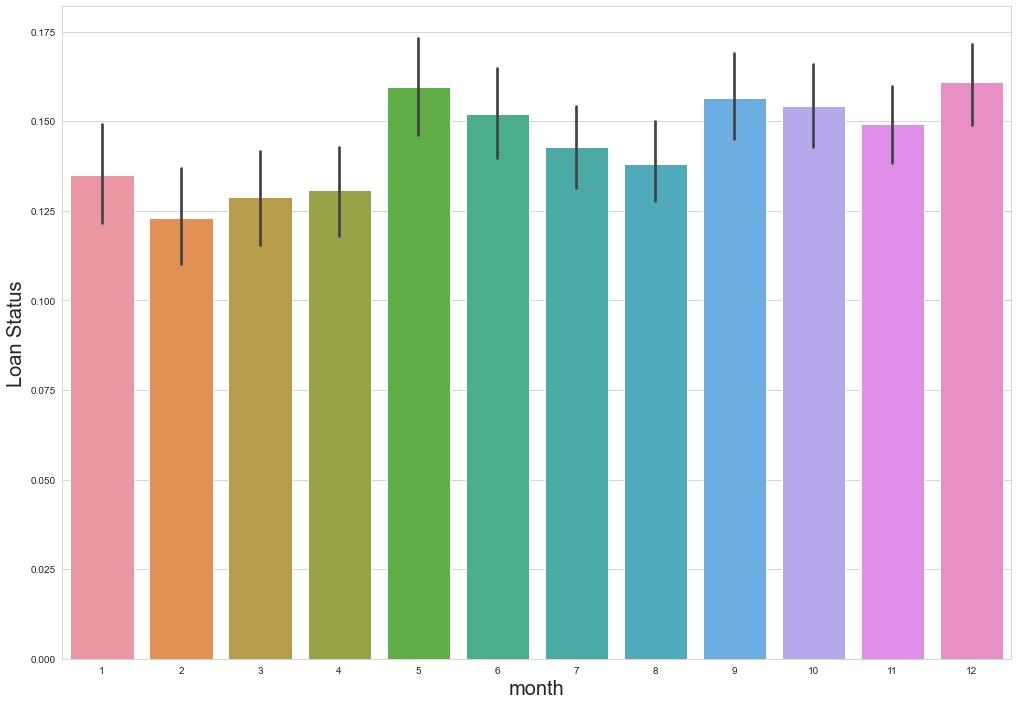

In [36]:
plots('month')

## 6. Let's now analyse how the default rate varies across continuous variables.


#### Loan Amount: loan_amnt

D:\A\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


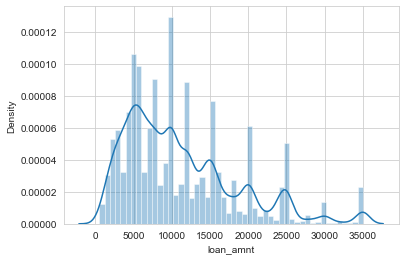

In [37]:
sns.distplot(df['loan_amnt'])
plt.show()

> Another way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.


> Let's create a categorical variable for the loan amount variable into small, medium, high, very high.


- loan_amount < 5000 `low`
- loan_amount >=5000 and loan_amount < 15000 `medium`
- loan_amount >= 15000 and loan_amount < 25000 `high`
- greater than 25000 `very high`

In [38]:
def loan_amount(x):
    if x < 5000:
        return 'Low'
    elif x < 15000:
        return 'Medium'
    elif x < 25000:
        return 'High'
    else:
        return 'Very High'

In [39]:
df['loan_amnt_grades'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [40]:
df.loan_amnt_grades.value_counts()

Medium       20675
High          7696
Low           7444
Very High     2762
Name: loan_amnt_grades, dtype: int64

> Let's compare the default rates across loan amount type

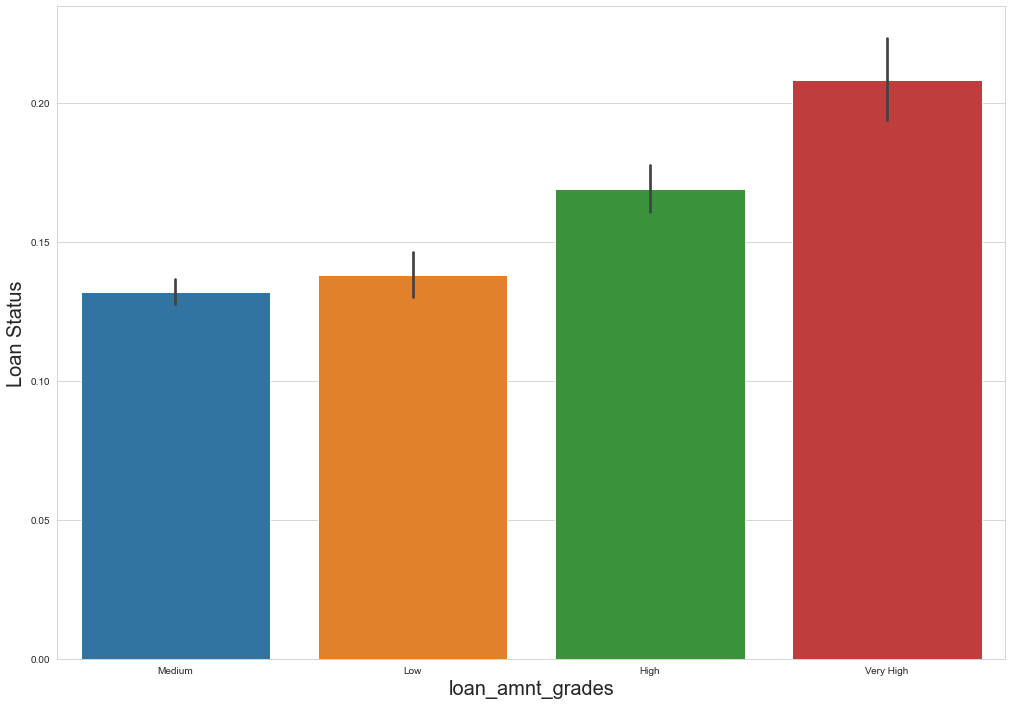

In [41]:
plots('loan_amnt_grades')

#### Let's also convert `funded amount invested` to bins (using the same scheme from loan_amount).

In [42]:
df['funded_amnt_inv_grades'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

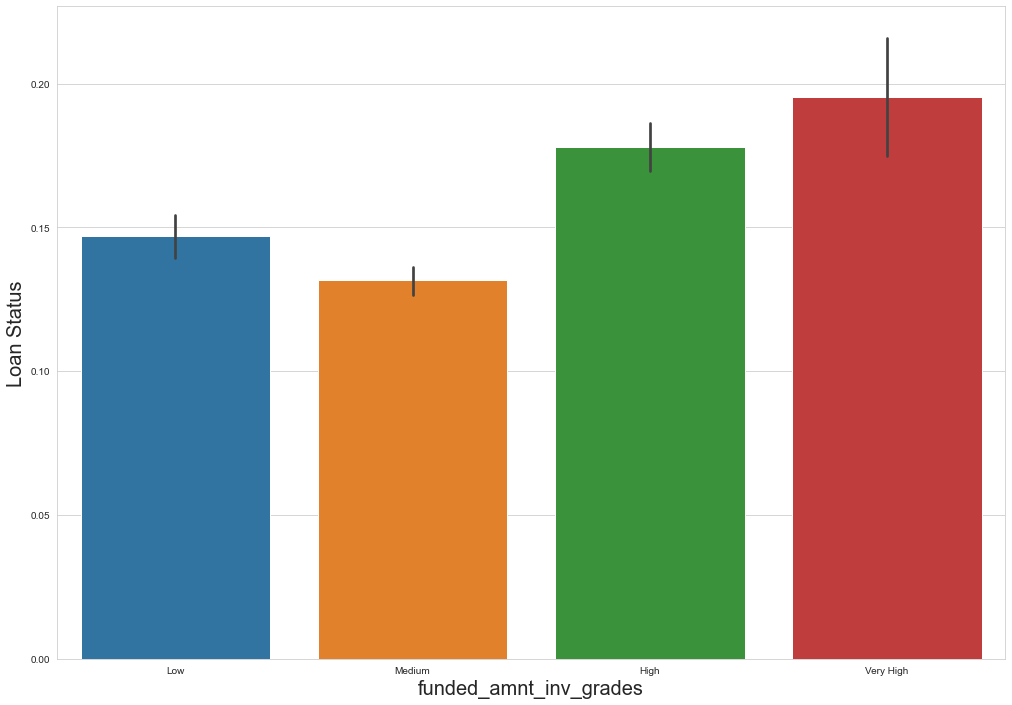

In [43]:
plots('funded_amnt_inv_grades')

## 7. Let's look at Interest Rate(int_rate)

- Use the following definitions for each categories.


    - <= 10 `low`
    - dti > 10 and dti <=15 `medium`
    - greater than 15 `high`

In [44]:
def interest_rate(x):
    if x <= 10:
        return 'Low'
    elif x <= 15:
        return 'Medium'
    else:
        return 'High'

In [45]:
df['int_rate_grades'] = df['int_rate'].apply(lambda x: interest_rate(x))

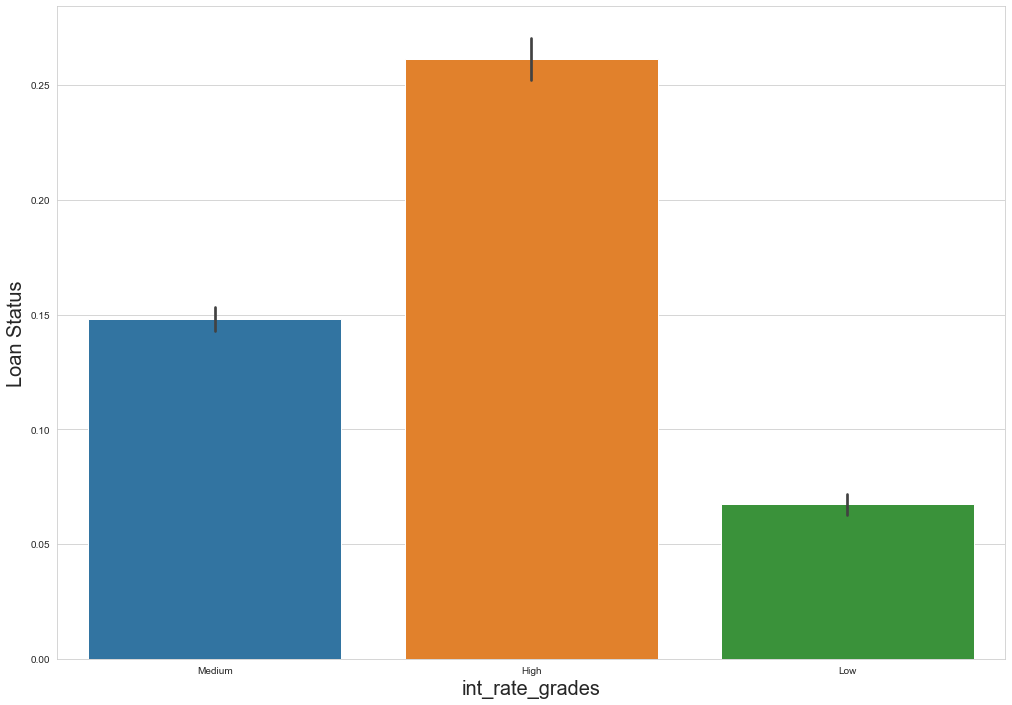

In [46]:
plots('int_rate_grades')

### debt-to-income (dti) ratio

- create a categorical variable of dti using your own function



- Use the following definitions for each categories.

    - <= 10 low
    - dti > 10 and dti <=20 medium
    - greater than 20 high


In [47]:
def dti_ratio(x):
    if x <= 10:
        return 'Low'
    elif x <= 20:
        return 'Medium'
    else:
        return 'High'

In [48]:
df['dti_grades'] = df['dti'].apply(lambda x: dti_ratio(x))

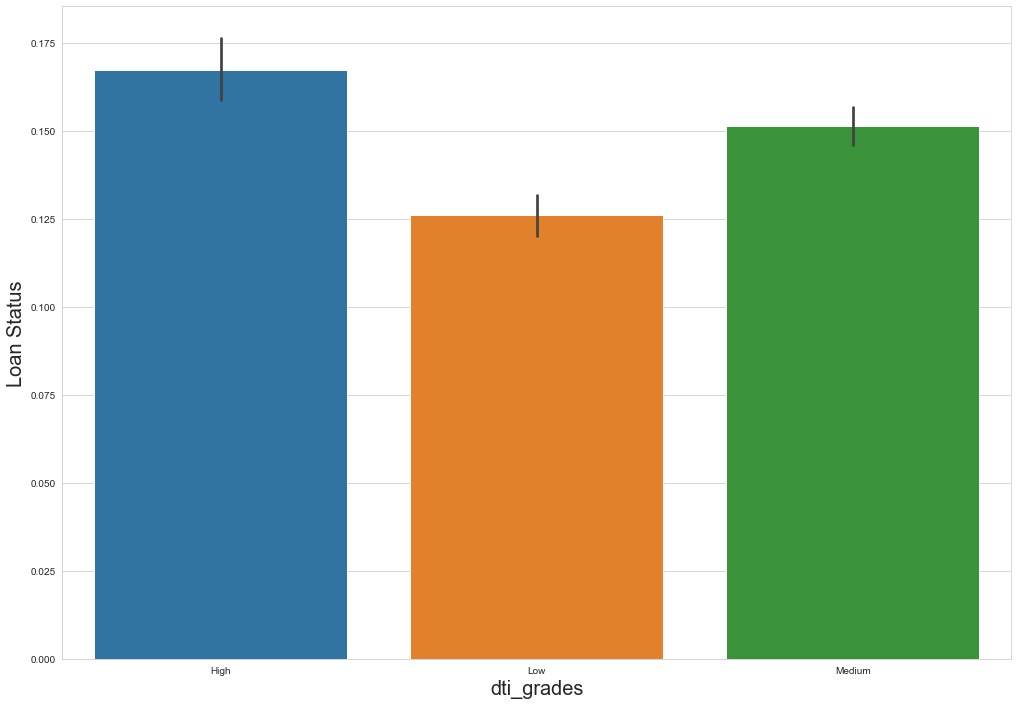

In [49]:
plots('dti_grades')

### funded amount


- Please create a categorical variable of funded_amount using your own function

- Use the following definitions for each categories.

    - <= 5000 low
    
    - funded_amount > 5000 and funded_amount <=15000 medium
    
    - greater than 15000 high

In [50]:
def funded_amount(x):
    if x <= 5000:
        return 'Low'
    elif x <= 15000:
        return 'Medium'
    else:
        return 'High'

In [51]:
df['funded_amnt_grades'] = df['funded_amnt'].apply(lambda x:funded_amount(x))

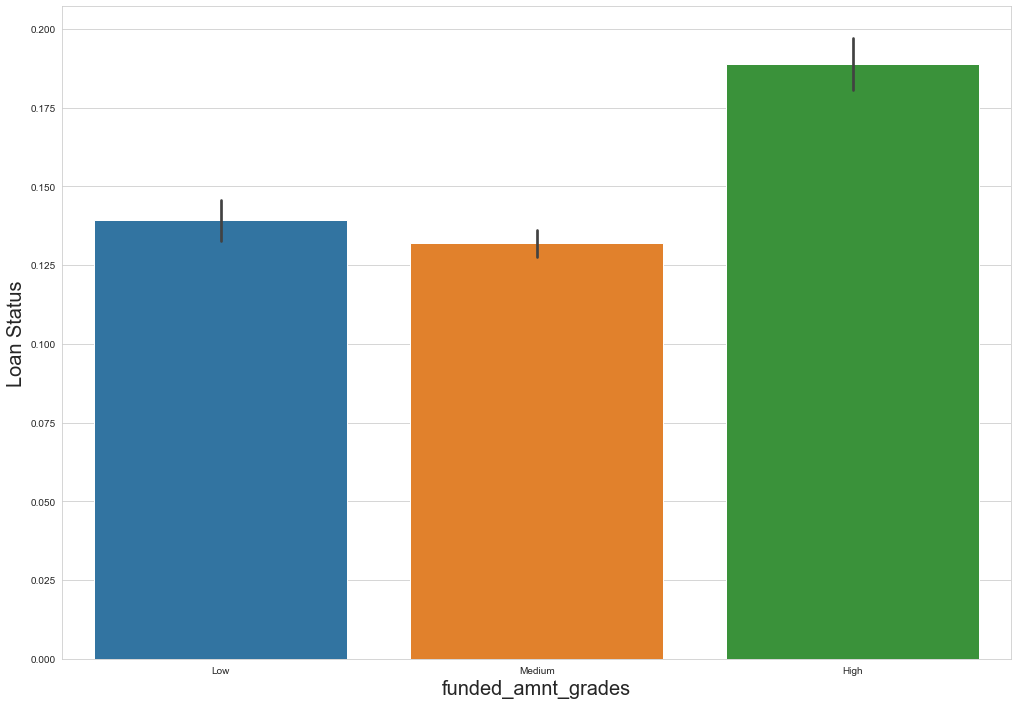

In [52]:
plots('funded_amnt_grades')

### Installment

> Please create a categorical variable of installment using your own function


- Use the following definitions for each categories.

    - installment <= 200 low
    - installment > 200 and installment <= 400 medium
    - installment > 400 and installment <= 600 high
    - greater than 600 = very high

In [53]:
def installment(x):
    if x < 200:
        return 'Low'
    elif x < 400:
        return 'Medium'
    elif x < 600:
        return 'High'
    else:
        return 'Very High'

In [54]:
df['installment_grades'] = df['installment'].apply(lambda x: installment(x))

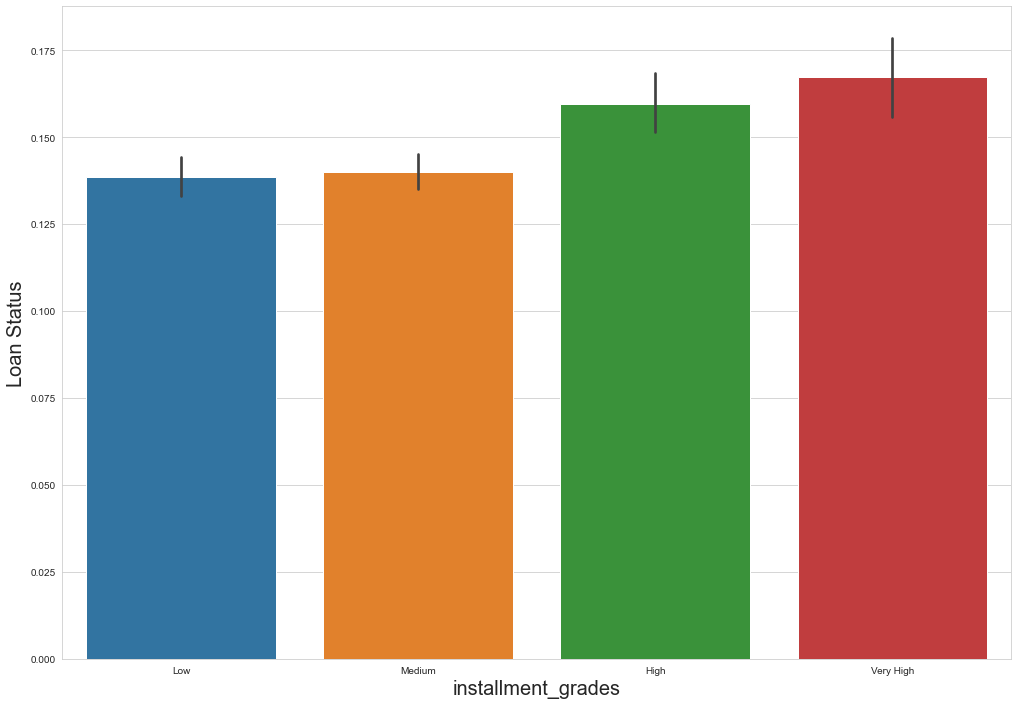

In [55]:
plots('installment_grades')

### Annual Income


> Please create a categorical variable of annual_income using your own function



- Use the following definitions for each categories.

    - less than or equal to 50k `low`
    - greater than 50k less than equal to 100 k `medium`
    - greater than 100k less than equal to 150k `high`
    - greater than 150k `very high`

In [56]:
def annual_income(x):
    if x < 50000:
        return 'Low'
    elif x < 100000:
        return 'Medium'
    elif x < 150000:
        return 'High'
    else:
        return 'Very High'

In [57]:
df['annual_inc_grades'] = df['annual_inc'] .apply(lambda x: annual_income(x))

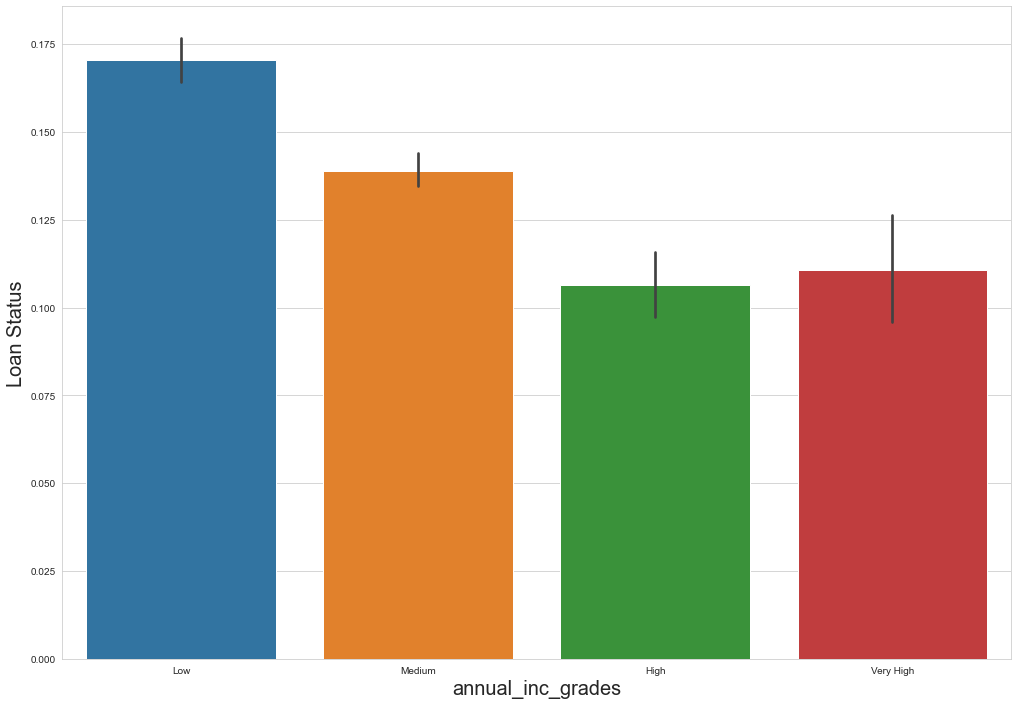

In [58]:
plots('annual_inc_grades')

### Employment Length

> Lets extract the numeric part from the variable employment length.


> First, let's drop the missing values from the column (otherwise the **regex code** below throws error) using regular expression to extract numeric values from the string convert to numeric

In [59]:
import re

df = df[~df['emp_length'].isnull()]

df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

- Next, let's drop the missing value observations in emp_length


- Then please create a categorical variable of emp_length using your own function



- Use the following definitions for each categories.

    - emp_length <= 1 `fresher`
    - emp_length > 1 and emp_length <=3 `junior`
    - emp_length > 3 and emp_length <=7 `senior`
    - greater than 7 `expert`

In [60]:
df['emp_length'].isnull().sum()

0

In [61]:
def employment_length(x):
    if x <= 1:
        return 'Fresher'
    elif x <= 3:
        return 'Junior'
    elif x<= 7:
        return 'Senior'
    else:
        return 'Expert'

In [62]:
df['emp_length_grades'] = df['emp_length'].apply(lambda x: employment_length(x))

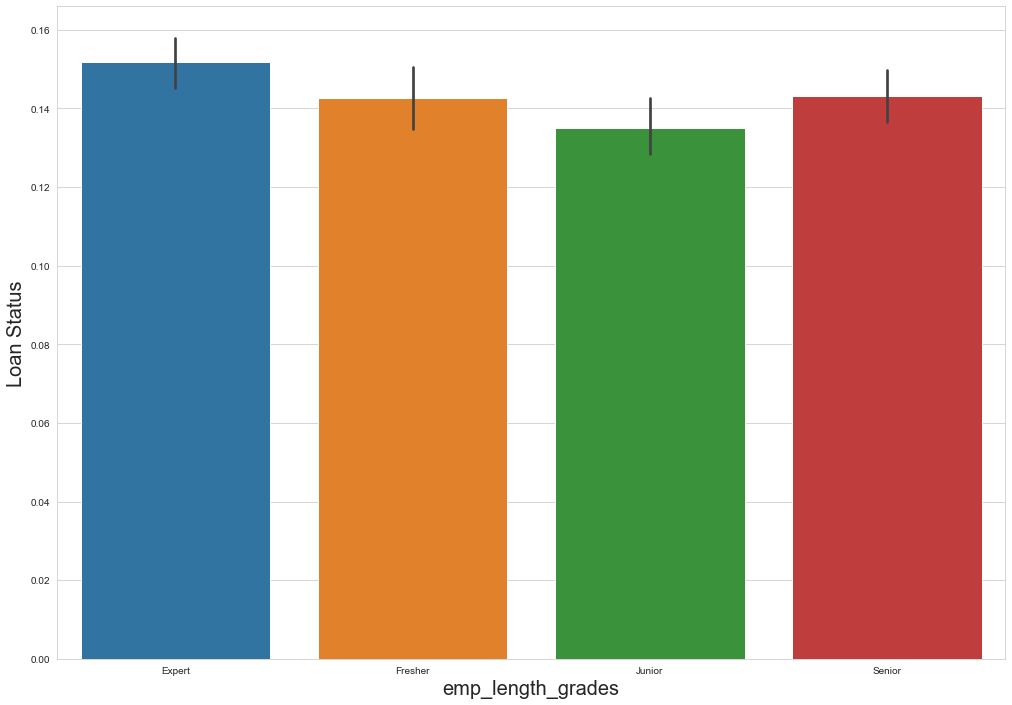

In [63]:
plots('emp_length_grades')

## 8. Segmented Univariate Analysis

<Figure size 1296x576 with 0 Axes>

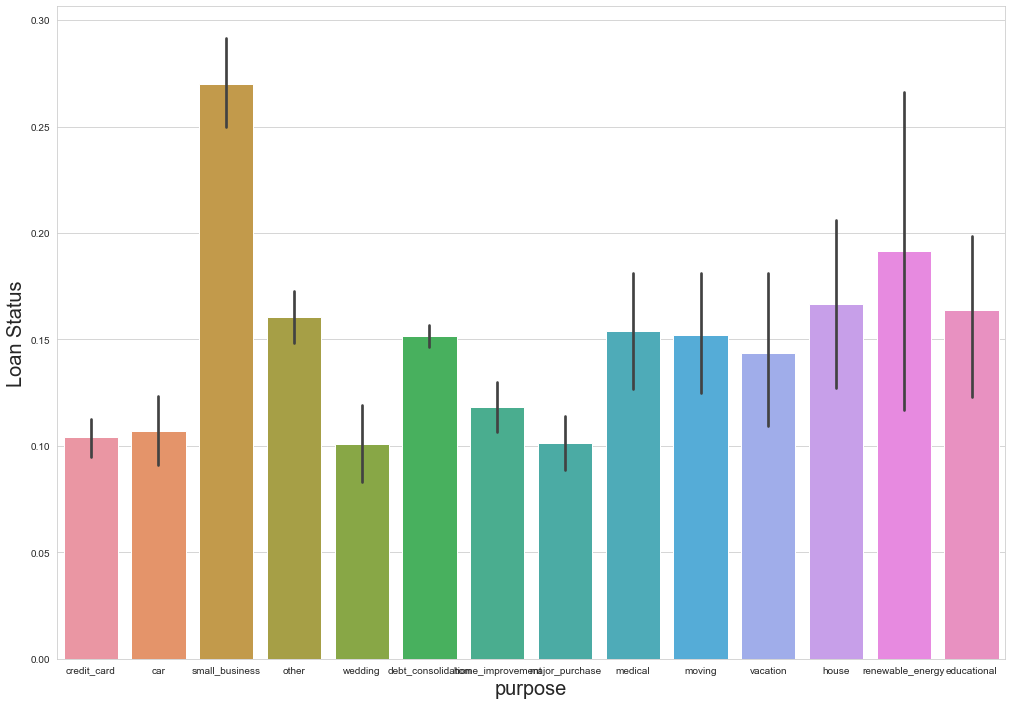

In [64]:
plt.figure(figsize=(18,8))
plots('purpose')

>  Now let's segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

In [65]:
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [66]:
top5_purposes = pd.DataFrame(df['purpose'].value_counts().head().reset_index())

top5_purposes.columns = ['purpose','numbers']

top5_purposes

,purpose,numbers
0,debt_consolidation,17675
1,credit_card,4899
2,other,3713
3,home_improvement,2785
4,major_purchase,2080


Text(0.5, 1.0, 'Top 5 Purposes')

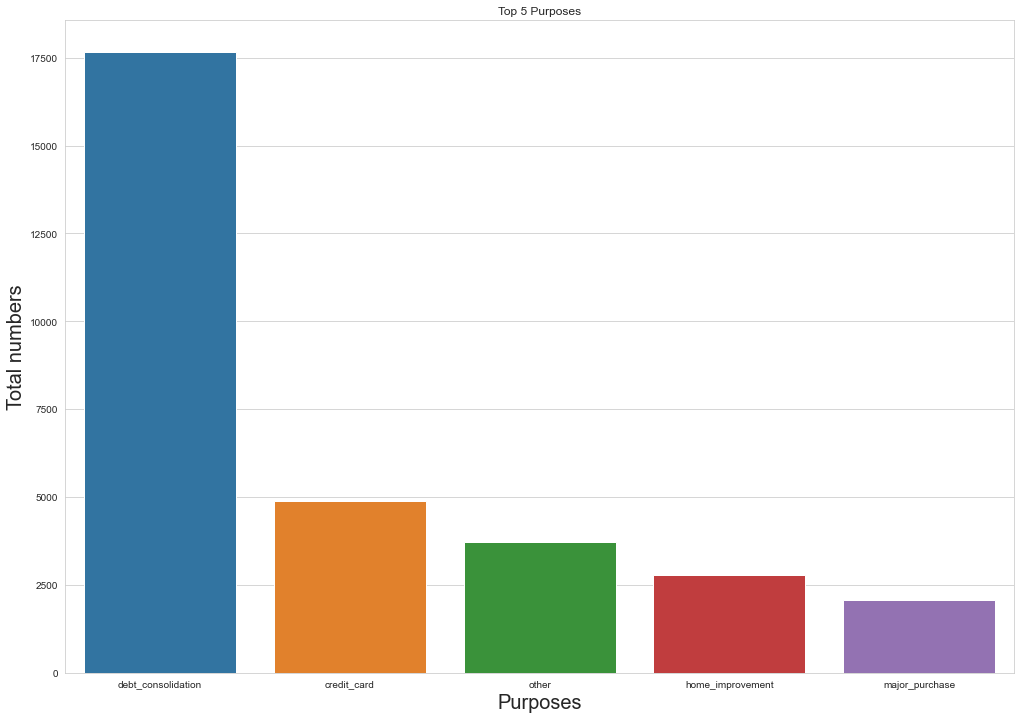

In [67]:
plt.figure(figsize=(17,12))

sns.barplot(x='purpose',
            y='numbers',
            data=top5_purposes)

plt.xlabel('Purposes', fontsize=20)
plt.ylabel('Total numbers', fontsize=20)
plt.title('Top 5 Purposes')

> let's now compare the default rates (loan_status) across two types of categorical variables;



> - purpose of loan (constant)


> - another categorical variable (which changes)



In [68]:
# create a function

def plot_segmented(categorical_variable):
    plt.figure(figsize=(17,12))
    
    sns.barplot(x = categorical_variable,
                y = 'loan_status',
                hue = 'purpose',
                data= df)
    plt.show()

### Let's check our new function in `term`/`grade`/`home ownership`/ `year`/`emp_length`/`interest rate`/`installment`/`dti`/`annual income`.


- **term** 

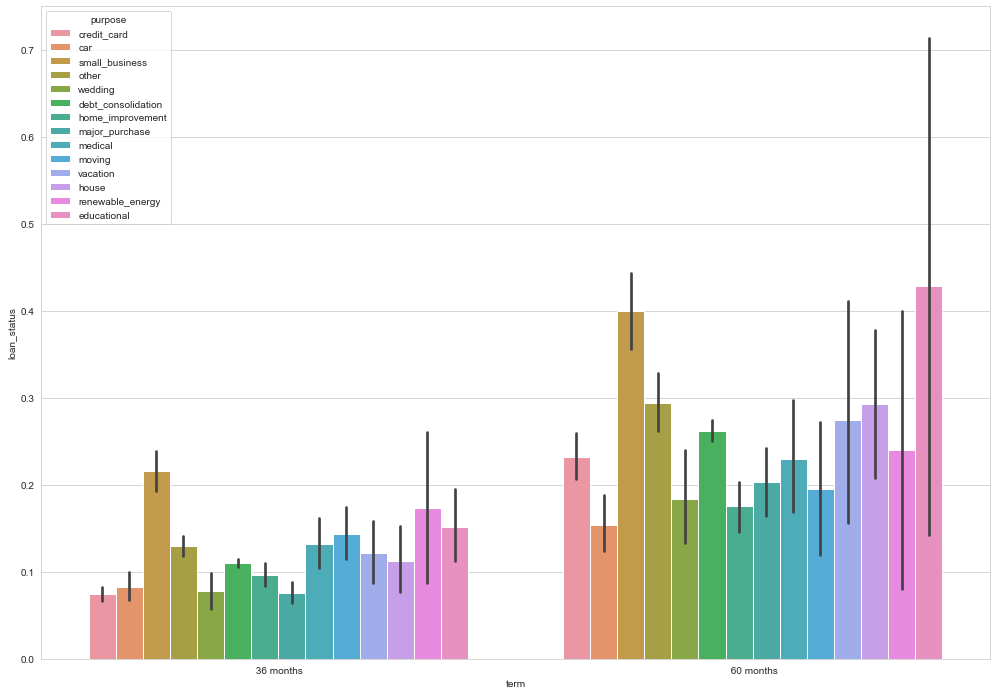

In [69]:
plot_segmented('term')

- **Grade**

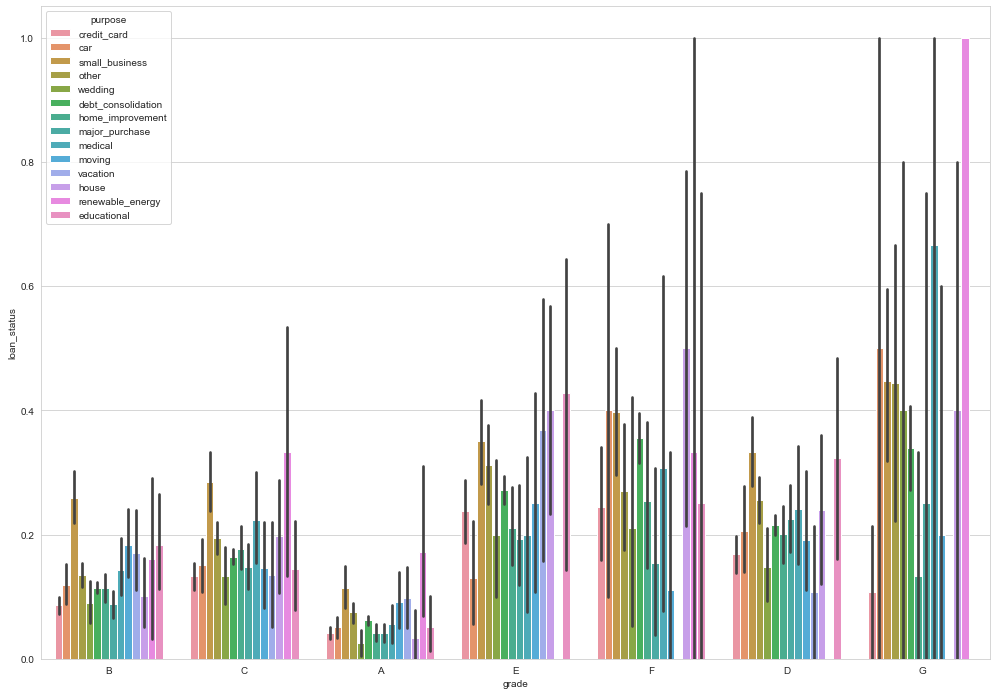

In [70]:
plot_segmented('grade')

- **home ownership**

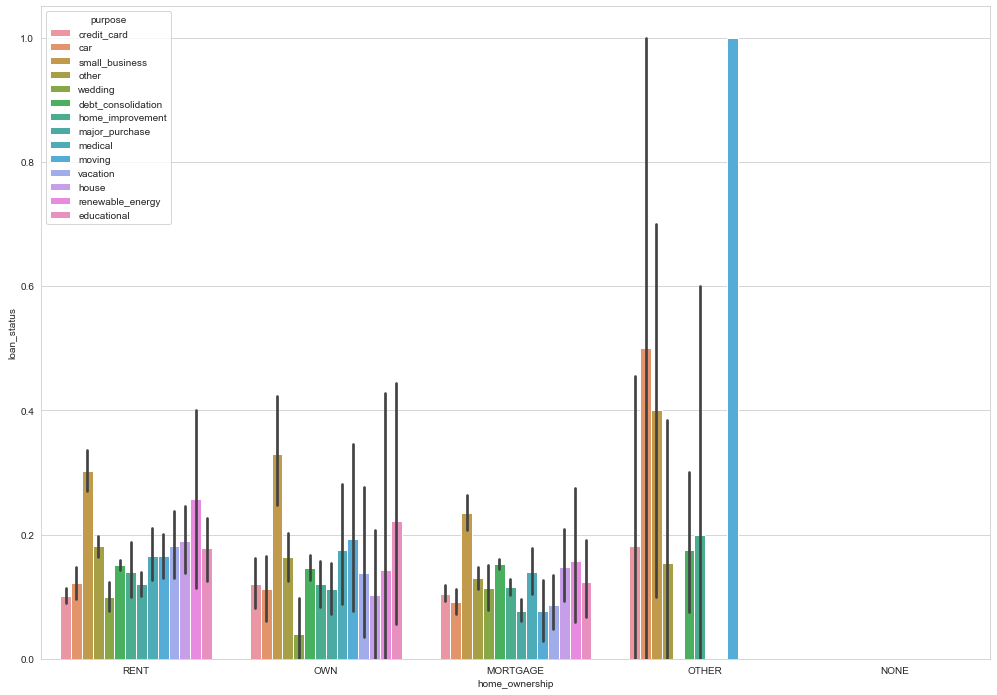

In [71]:
plot_segmented('home_ownership')

- **year**

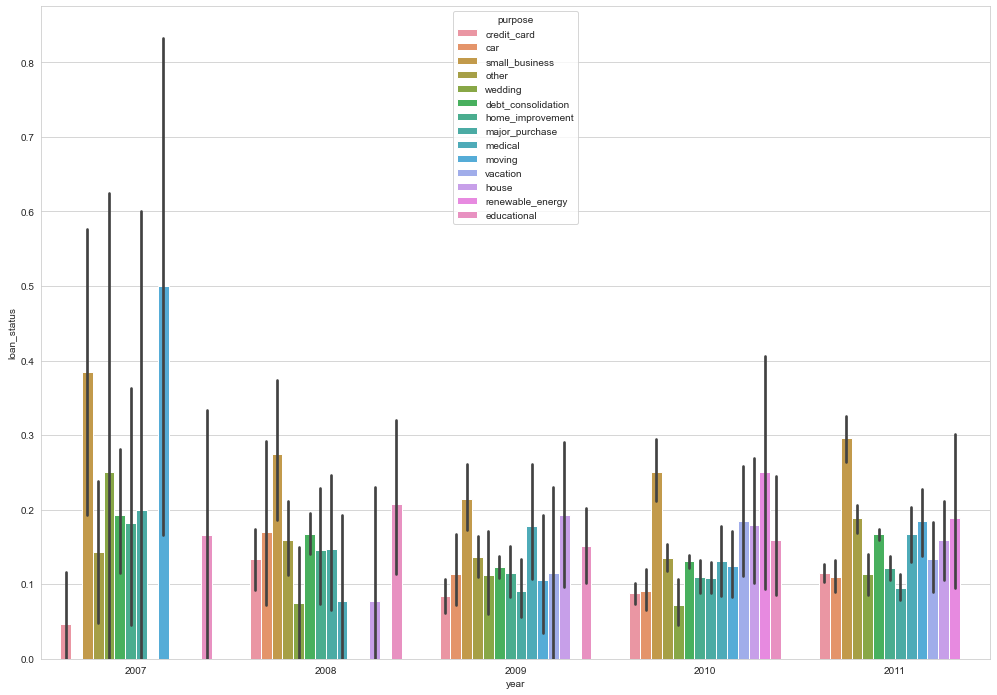

In [72]:
plot_segmented('year')

- **employment length**

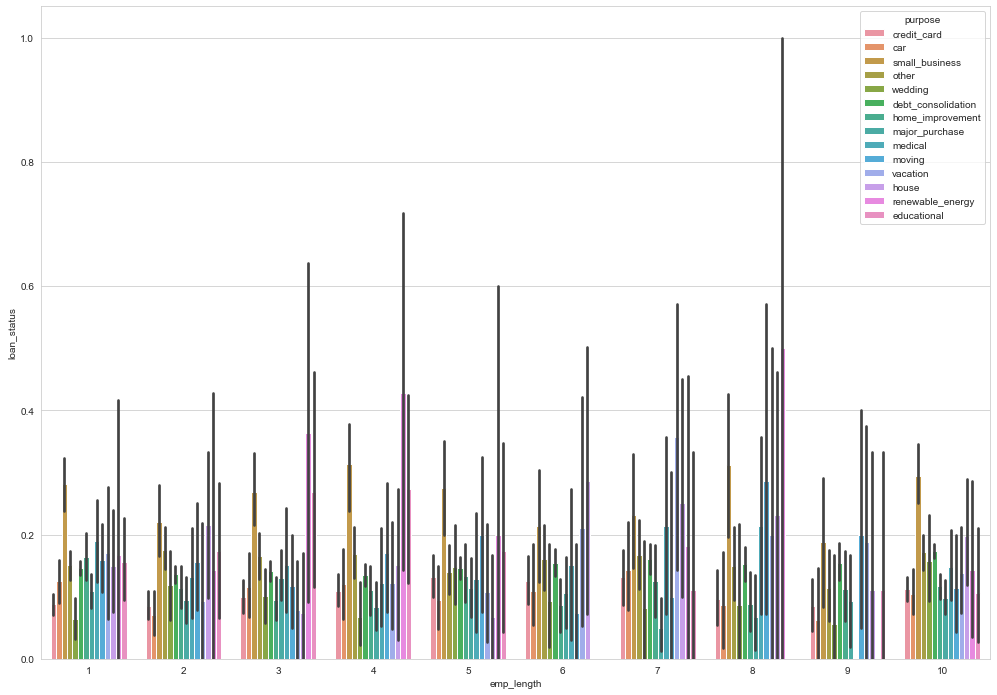

In [73]:
plot_segmented('emp_length')

- **loan amount**

> Let's create a new function that can plot the relationship between loan amount with other variables.

In [74]:
def plots2(categorical_variable):
    plt.figure(figsize=(17,12))
    
    sns.barplot(x = 'purpose',
                y = categorical_variable,
                data= df)
    plt.xticks(rotation='80', size=17)
    plt.xlabel('Purposes', fontsize=20)
    plt.ylabel(categorical_variable, fontsize=20)
    plt.show()

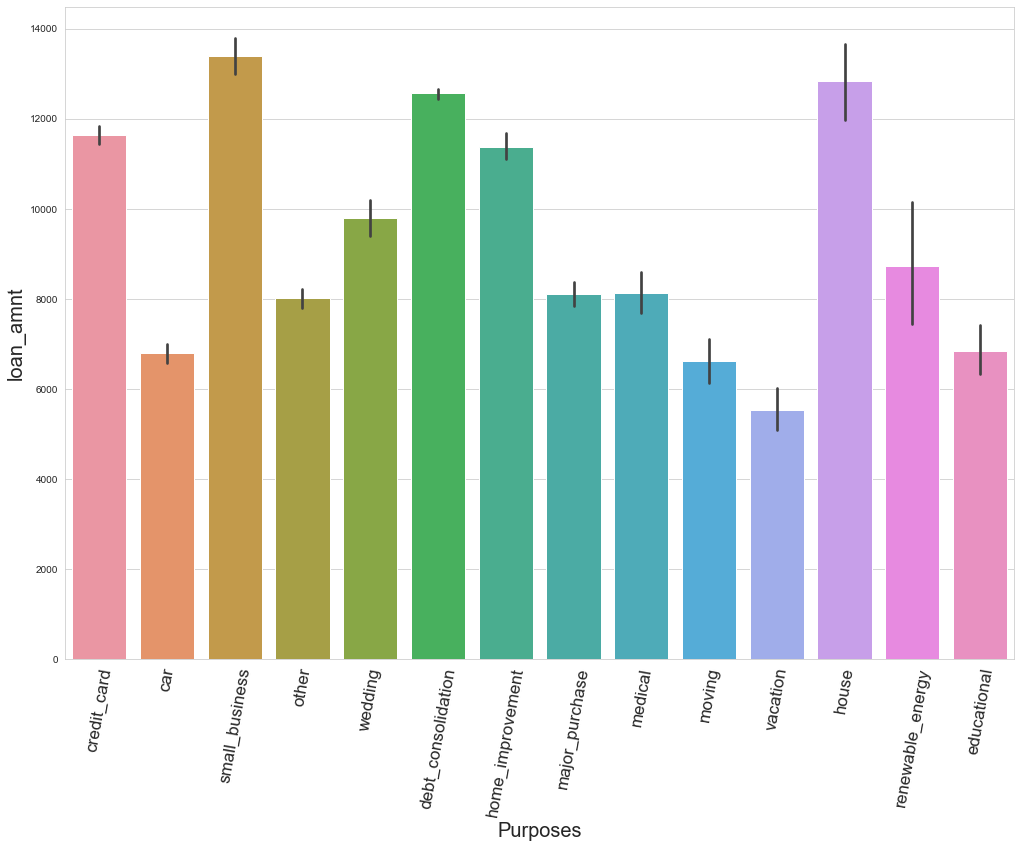

In [75]:
plots2('loan_amnt')

- **Interest Rate vs Purpose**

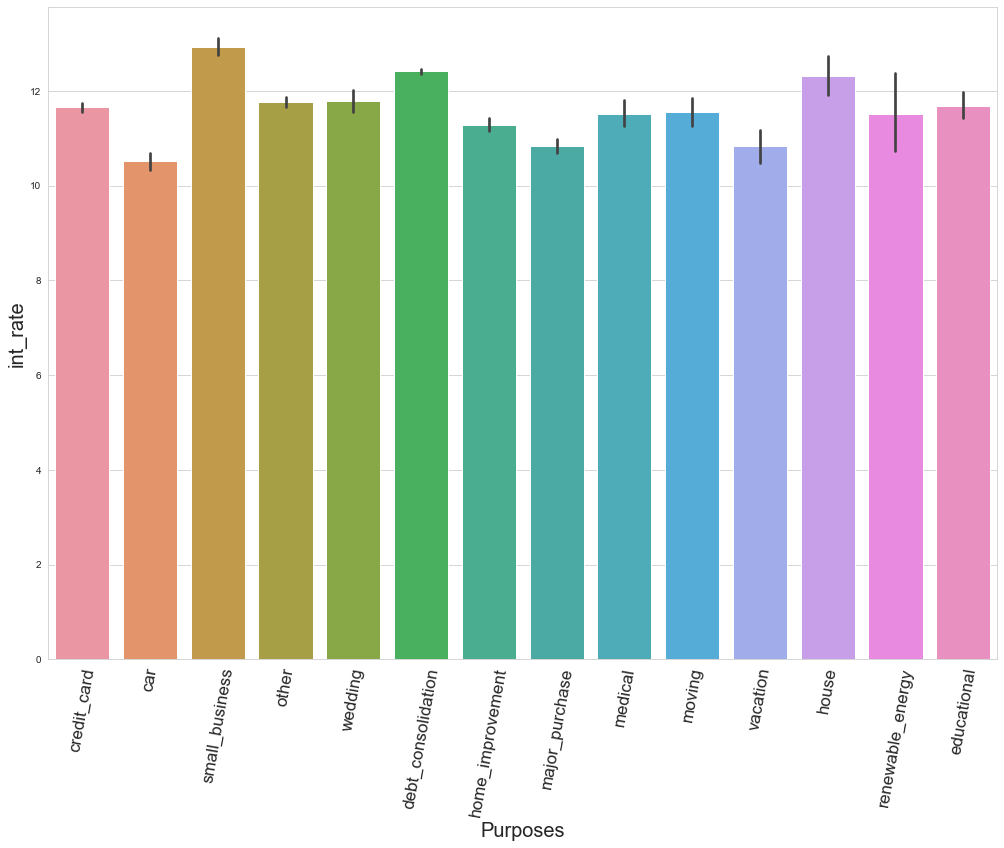

In [76]:
plots2('int_rate')

- **Installment VS purpose**

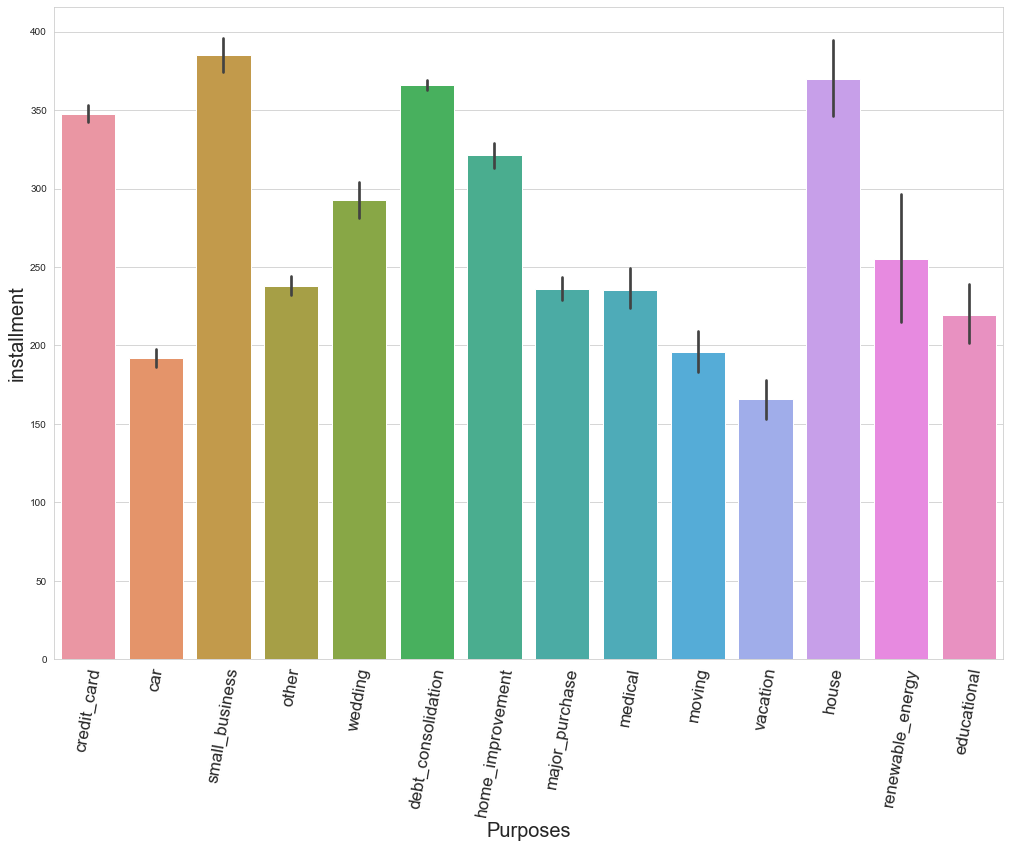

In [77]:
plots2('installment')

- **debt-to-income (dti) ratio VS purpose**

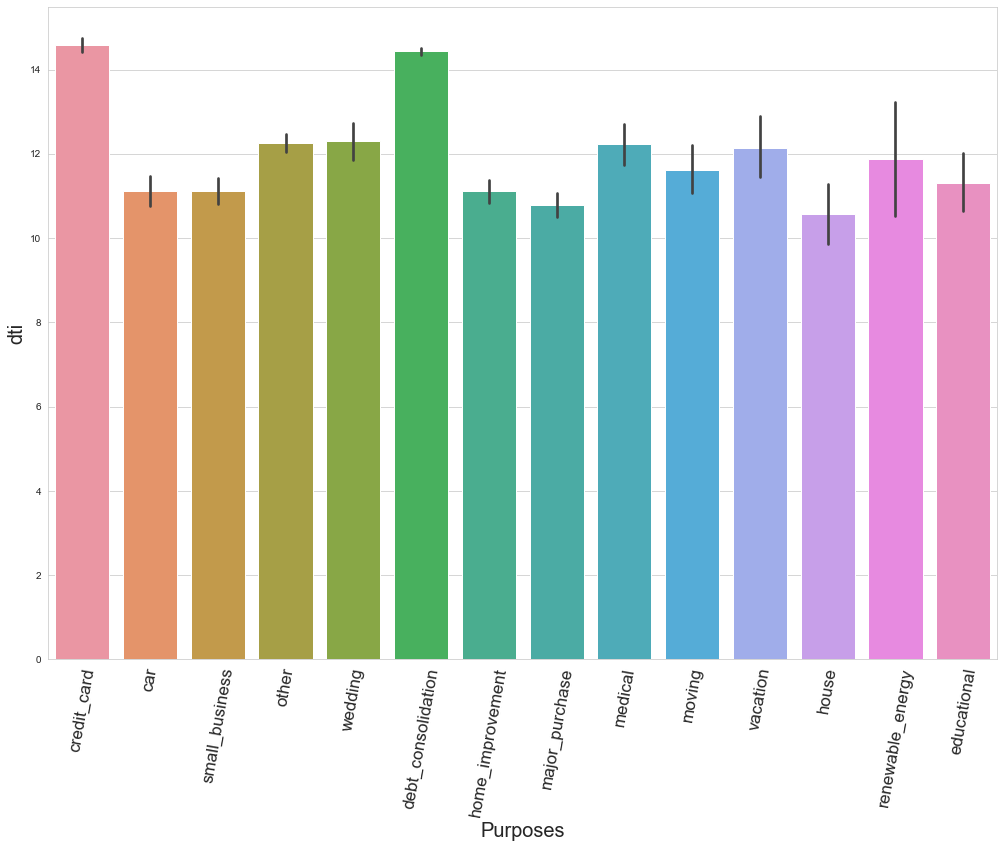

In [78]:
plots2('dti')

- **Annual Income VS purpose**

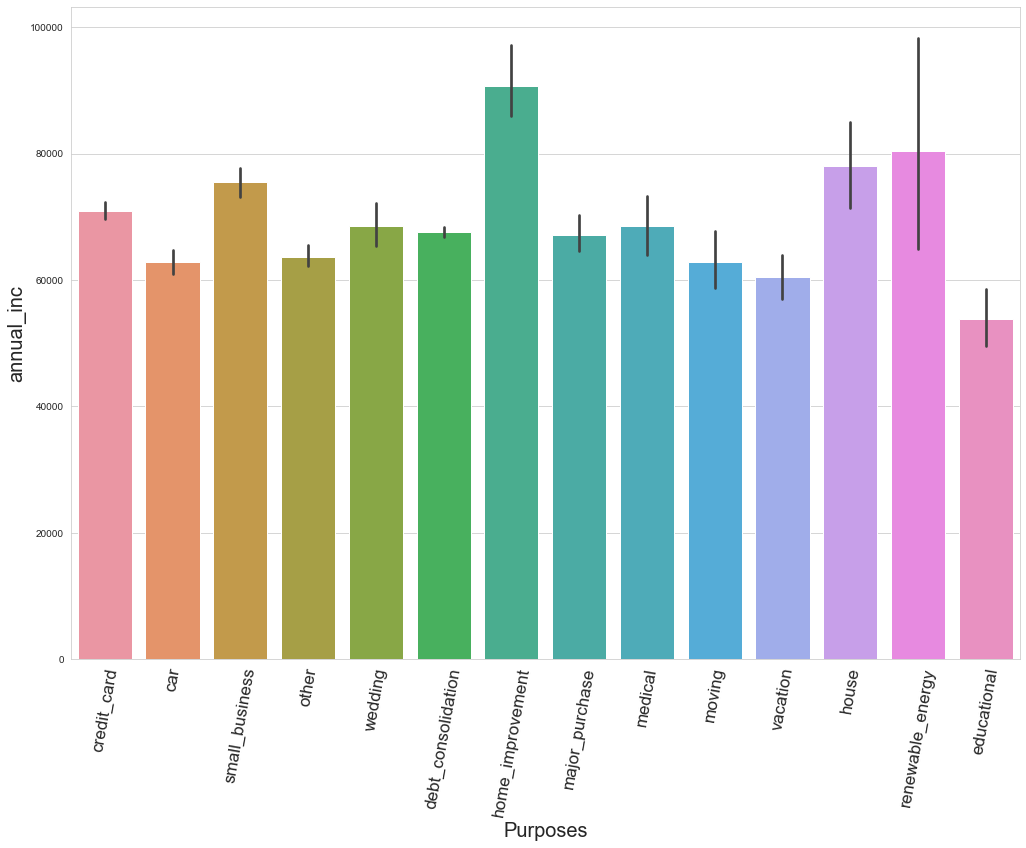

In [79]:
plots2('annual_inc')

### Let's have a look at the role of **annual income**.



> A good way to quantify the effect of a categorical variable on default rate is to see how much does the default rate vary across the categories.



- Let's see an example using annual_inc as the categorical variable.

In [80]:
df.groupby('annual_inc_grades')['loan_status'].mean().sort_values(ascending=False)

annual_inc_grades
Low          0.166801
Medium       0.138240
Very High    0.109929
High         0.106704
Name: loan_status, dtype: float64

### Write a function which takes in a categorical variable and computed the average default rate across the categories.

> It can also compute the difference between the highest and the lowest default rate across the categories, which is a decent metric indicating the effect of the varaible on default rate.

In [81]:
def diff_rate(categories):
    
    Loan_Status = df.groupby(categories)['loan_status'].mean().sort_values(ascending=False)
    
    return (Loan_Status, Loan_Status[0] - Loan_Status[-1])

In [82]:
annual_income_default, annual_inc_difference = diff_rate('annual_inc_grades')

In [83]:
print(annual_income_default)

annual_inc_grades
Low          0.166801
Medium       0.138240
Very High    0.109929
High         0.106704
Name: loan_status, dtype: float64


In [84]:
print(annual_inc_difference)

0.06009635195980842


- Thus, there is a 6% increase in default rate as you go from high to low annual income.

In [85]:
int_default, interest_difference = diff_rate('int_rate_grades')

print(int_default)

int_rate_grades
High      0.259898
Medium    0.145470
Low       0.064475
Name: loan_status, dtype: float64


In [86]:
print(interest_difference)

0.19542258803184365


> You can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

### Variables in the Dataset


- `acc_now_delinq`	The number of accounts on which the borrower is now delinquent.
- `acc_open_past_24mths`	Number of trades opened in past 24 months.
- addr_state`	The state provided by the borrower in the loan application
- `all_util`	Balance to credit limit on all trades
- `annual_inc`	The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint`	The combined self-reported annual income provided by the co-borrowers during registration
- `application_type`	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `avg_cur_bal`	Average current balance of all accounts
- `bc_open_to_buy`	Total open to buy on revolving bankcards.
- `bc_util`	Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- `chargeoff_within_12_mths`	Number of charge-offs within 12 months
- `collection_recovery_fee`	post charge off collection fee
- `collections_12_mths_ex_med`	Number of collections in 12 months excluding medical collections
- `delinq_2yrs`	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `delinq_amnt`	The past-due amount owed for the accounts on which the borrower is now delinquent.
- `desc`	Loan description provided by the borrower
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `dti_joint`	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `earliest_cr_line`	The month the borrower's earliest reported credit line was opened
- `emp_length`	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- `emp_title`	The job title supplied by the Borrower when applying for the loan.*
- `fico_range_high`	The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low`	The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt`	The total amount committed to that loan at that point in time.
- `funded_amnt_inv`	The total amount committed by investors for that loan at that point in time.
- `grade`	LC assigned loan grade
- `home_ownership`	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `id`	A unique LC assigned ID for the loan listing.
- `il_util`	Ratio of total current balance to high credit/credit limit on all install acct
- `initial_list_status`	The initial listing status of the loan. Possible values are – W, F
- `inq_fi`	Number of personal finance inquiries
- `inq_last_12m`	Number of credit inquiries in past 12 months
- `inq_last_6mths`	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `installment`	The monthly payment owed by the borrower if the loan originates.
- `int_rate`	Interest Rate on the loan
- `issue_d`	The month which the loan was funded
- `last_credit_pull_d`	The most recent month LC pulled credit for this loan
- `last_fico_range_high`	The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low`	The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt`	Last total payment amount received
- `last_pymnt_d`	Last month payment was received
- `loan_amnt`	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- `loan_status`	Current status of the loan
- `max_bal_bc`	Maximum current balance owed on all revolving accounts
- `member_id`	A unique LC assigned Id for the borrower member.
- `mo_sin_old_il_acct`	Months since oldest bank installment account opened
- `mo_sin_old_rev_tl_op`	Months since oldest revolving account opened
- `mo_sin_rcnt_rev_tl_op`	Months since most recent revolving account opened
- `mo_sin_rcnt_tl`	Months since most recent account opened
- `mort_acc`	Number of mortgage accounts.
- `mths_since_last_delinq`	The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog`	Months since most recent 90-day or worse rating
- `mths_since_last_record`	The number of months since the last public record.
- `mths_since_rcnt_il`	Months since most recent installment accounts opened
- `mths_since_recent_bc`	Months since most recent bankcard account opened.
- `mths_since_recent_bc_dlq`	Months since most recent bankcard delinquency
- `mths_since_recent_inq`	Months since most recent inquiry.
- `mths_since_recent_revol_delinq`	Months since most recent revolving delinquency.
- `next_pymnt_d`	Next scheduled payment date
- `num_accts_ever_120_pd`	Number of accounts ever 120 or more days past due
- `num_actv_bc_tl`	Number of currently active bankcard accounts
- `num_actv_rev_tl`	Number of currently active revolving trades
- `num_bc_sats`	Number of satisfactory bankcard accounts
- `num_bc_tl`	Number of bankcard accounts
- `num_il_tl`	Number of installment accounts
- `num_op_rev_tl`	Number of open revolving accounts
- `num_rev_accts`	Number of revolving accounts
- `num_rev_tl_bal_gt_0`	Number of revolving trades with balance >0
- `num_sats`	Number of satisfactory accounts
- `num_tl_120dpd_2m`	Number of accounts currently 120 days past due (updated in past 2 months)
- `num_tl_30dpd`	Number of accounts currently 30 days past due (updated in past 2 months)
- `num_tl_90g_dpd_24m`	Number of accounts 90 or more days past due in last 24 months
- `num_tl_op_past_12m`	Number of accounts opened in past 12 months
- `open_acc`	The number of open credit lines in the borrower's credit file.
- `open_acc_6m`	Number of open trades in last 6 months
- `open_il_12m`	Number of installment accounts opened in past 12 months
- `open_il_24m`	Number of installment accounts opened in past 24 months
- `open_il_6m`	Number of currently active installment trades
- `open_rv_12m`	Number of revolving trades opened in past 12 months
- `open_rv_24m`	Number of revolving trades opened in past 24 months
- `out_prncp`	Remaining outstanding principal for total amount funded
- `out_prncp_inv`	Remaining outstanding principal for portion of total amount funded by investors
- `pct_tl_nvr_dlq`	Percent of trades never delinquent
- `percent_bc_gt_75`	Percentage of all bankcard accounts > 75% of limit.
- `policy_code`	publicly available policy_code=1; new products not publicly available policy_code=2"
- `pub_rec`	Number of derogatory public records
- `pub_rec_bankruptcies`	Number of public record bankruptcies
- `purpose`	A category provided by the borrower for the loan request. 
- `pymnt_plan`	Indicates if a payment plan has been put in place for the loan
- `recoveries`	post charge off gross recovery
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- `sub_grade`	LC assigned loan subgrade
- `tax_liens`	Number of tax liens
- `term`	The number of payments on the loan. Values are in months and can be either 36 or 60.
- `title`	The loan title provided by the borrower
- `tot_coll_amt`	Total collection amounts ever owed
- `tot_cur_bal`	Total current balance of all accounts
- `tot_hi_cred_lim`	Total high credit/credit limit
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `total_bal_ex_mort`	Total credit balance excluding mortgage
- `total_bal_il`	Total current balance of all installment accounts
- `total_bc_limit`	Total bankcard high credit/credit limit
- `total_cu_tl`	Number of finance trades
- `total_il_high_credit_limit`	Total installment high credit/credit limit
- `total_pymnt`	Payments received to date for total amount funded
- `total_pymnt_inv`	Payments received to date for portion of total amount funded by investors
- `total_rec_int`	Interest received to date
- `total_rec_late_fee`	Late fees received to date
- `total_rec_prncp`	Principal received to date
- `total_rev_hi_lim`  	Total revolving high credit/credit limit
- `url`	URL for the LC page with listing data.
- `verification_status`	Indicates if income was verified by LC, not verified, or if the income source was verified
- `verified_status_joint`	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `zip_code`	The first 3 numbers of the zip code provided by the borrower in the loan application.